In [ ]:
!wget https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EdgpRTbM6vJLpU0yBrk10aUB2VO1s23c4tzbUWLCQu_VEA?download=1
!mv EdgpRTbM6vJLpU0yBrk10aUB2VO1s23c4tzbUWLCQu_VEA?download=1 dataset.xlsx

--2024-08-24 20:38:09--  https://aseblr-my.sharepoint.com/:x:/g/personal/bl_en_u4cse22138_bl_students_amrita_edu/EdgpRTbM6vJLpU0yBrk10aUB2VO1s23c4tzbUWLCQu_VEA?download=1
Resolving aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to aseblr-my.sharepoint.com (aseblr-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/custom_dataset_processed.xlsx?ga=1 [following]
--2024-08-24 20:38:10--  https://aseblr-my.sharepoint.com/personal/bl_en_u4cse22138_bl_students_amrita_edu/Documents/Semester%205/Machine%20Learning/Project/Dataset/custom_dataset_processed.xlsx?ga=1
Reusing existing connection to aseblr-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 624976 (610K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]


In [ ]:
import pandas as pd

# Read the Excel file named "dataset.xlsx" into a Pandas DataFrame
df = pd.read_excel("./dataset.xlsx")

# Display the DataFrame using the 'display' function for a formatted output
display(df)

,text,text_length,average_word_length,unique_word_count,stop_word_count,special_character_count,keywords,sentiment,source,is_AI
0,Harsh on Les Ames to be included here. While h...,267,4.176,45,26,54,"first innings, first time, Les Ames",0,Reddit,1
1,DK Popa on there too? Tbh he&apos;s had some b...,65,3.333,14,9,15,"DK Popa, Tbh he&apos",0,Reddit,0
2,And got out for a golden duck in the first inn...,133,3.926,24,13,27,"first innings, first, test cricket",0,Reddit,0
3,Surprising how Prior was persisted by England ...,88,4.867,15,7,15,NaN,1,Reddit,0
4,Madande making Nsync proud,26,5.750,4,0,3,NaN,1,Reddit,1
...,...,...,...,...,...,...,...,...,...,...
4879,Review incoming?? On autofocus or the main cha...,51,5.125,8,3,10,NaN,0,Instagram,0
4880,The haters reigned after Thriller's unpreceden...,204,4.714,32,15,39,NaN,0,Instagram,1
4881,Ya está listo mi chocolate casero???,37,4.500,6,0,10,Ya está listo mi chocolate casero,0,Instagram,0
4882,I can’t wait! I love my Pixel ecosystem and lo...,89,4.438,15,8,18,Pixel ecosystem,1,Instagram,0


In [ ]:
df.isnull().sum()

,0
text,1
text_length,0
average_word_length,10
unique_word_count,0
stop_word_count,0
special_character_count,0
keywords,1468
sentiment,0
source,0
is_AI,0


In [ ]:
# Drop rows with missing values
df = df.dropna()

# Print the length of the dataframe after dropping rows with missing values
print(len(df.index.values))

3415


In [ ]:
# A1
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Select features for the model
X = df.loc[:, ["text_length", "unique_word_count", "stop_word_count",	"special_character_count"]]

# Select target variable
y = df["average_word_length"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using the R-squared score
model.score(X_test, y_test)

0.522211839227296

In [ ]:
# Input features for prediction
input = [267, 45,	26, 54]

# Make a prediction using the trained model
model.predict([input])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.99523408])

In [ ]:
# A2
# Import necessary metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
RMSE = MSE ** 0.5

# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = mean_absolute_percentage_error(y_test, y_pred)

# Calculate R-squared score (R2)
R2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MSE = {MSE}")
print(f"RMSE = {RMSE}")
print(f"MAPE = {MAPE}")
print(f"R2 Score = {R2}")

MSE = 0.3080345469594916
RMSE = 0.5550086007977638
MAPE = 0.0935794034328865
R2 Score = 0.522211839227296


In [ ]:
# A4
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Initialize KMeans with 2 clusters, random state 42, and automatic initialization
k_means = KMeans(n_clusters=2, random_state=42, n_init="auto")

# Fit the KMeans model to the training data
k_means.fit(X_train, y_train)

# Get the cluster centers
k_means.cluster_centers_

array([[362.97103129,  48.35341831,  23.49942063,  75.55504056],
       [ 94.87229862,  16.05762934,   7.09823183,  19.99869024]])

In [ ]:
# A5
# Import necessary metrics for cluster evaluation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate Silhouette Score (SH)
SH = silhouette_score(X_train, k_means.labels_)

# Calculate Calinski-Harabasz Score (CH)
CH = calinski_harabasz_score(X_train, k_means.labels_)

# Calculate Davies-Bouldin Score (DB)
DB = davies_bouldin_score(X_train, k_means.labels_)

# Print the cluster evaluation metrics
print(f"SH = {SH}")
print(f"CH = {CH}")
print(f"DB = {DB}")

SH = 0.6220075139254441
CH = 2177.9877920426843
DB = 0.6434235087788122


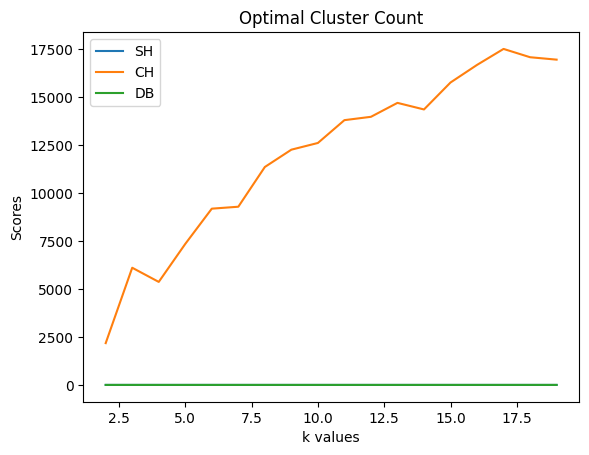

In [ ]:
# A6
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Define the range of k values to test
k_values = range(2, 20)

# Initialize lists to store scores for each metric
SH_scores = []
CH_scores = []
DB_scores = []

# Iterate through the k values
for k in k_values:
    # Initialize and fit KMeans model
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(X_train)

    # Calculate the scores for each metric
    SH = silhouette_score(X_train, kmeans.labels_)
    CH = calinski_harabasz_score(X_train, kmeans.labels_)
    DB = davies_bouldin_score(X_train, kmeans.labels_)

    # Append scores to corresponding lists
    SH_scores.append(SH)
    CH_scores.append(CH)
    DB_scores.append(DB)

# Plot the scores for each metric against k values
plt.plot(k_values, SH_scores, label="SH")
plt.plot(k_values, CH_scores, label="CH")
plt.plot(k_values, DB_scores, label="DB")

# Add legend, title, and axis labels
plt.legend()
plt.title("Optimal Cluster Count")
plt.xlabel("k values")
plt.ylabel("Scores")

# Display the plot
plt.show()

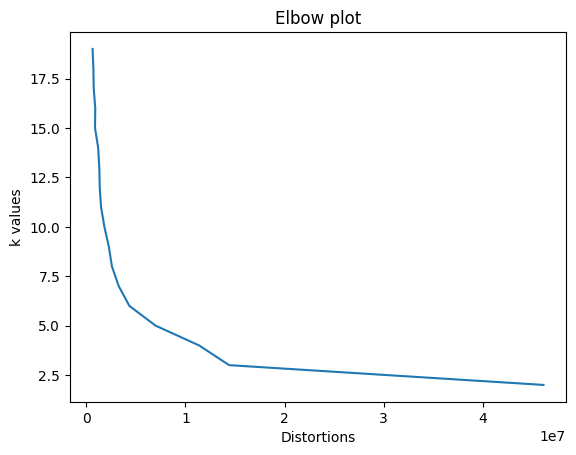

In [ ]:
# A7
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Initialize lists to store distortions and k values
distortions = []
k_values = range(2, 20)

# Iterate through k values
for k in k_values:
  # Initialize and fit KMeans model
  kmeans = KMeans(n_clusters=k, n_init="auto")
  kmeans.fit(X_train, y_train)

  # Calculate and append distortion (inertia)
  distortions.append(kmeans.inertia_)

# Plot the distortions against k values
plt.plot(distortions, k_values)

# Set title, x-axis label, and y-axis label
plt.title("Elbow plot")
plt.xlabel("Distortions")
plt.ylabel("k values")

# Display the plot
plt.show()